In [2]:
#revision - pregovor - trigonometric polynomials
import numpy as np
import matplotlib.pyplot as plt
import math

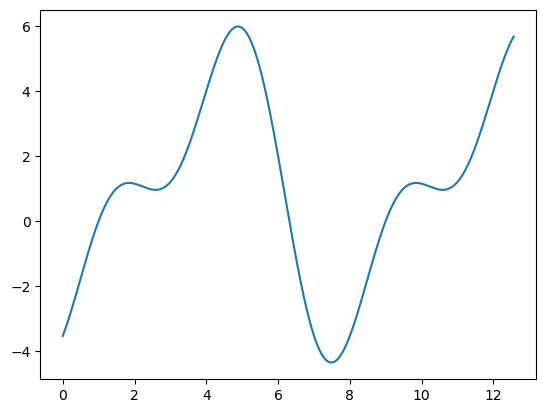

In [3]:

nodes = np.array([1, 1.5, 3, 4,6])
values = np.array([0, 1, 1.2, 4, 2])

nodes_ = np.array([item * 2*np.pi / 8 for item in nodes])
A = np.ones([5, 5])
converter=2*np.pi/8
for i in range(5):
    for j in range(1,5):
        if j % 2 == 0:
            A[i][j] = np.sin((j/2) * nodes_[i])
        else:
            A[i][j] = np.cos((math.floor(j/2) + 1) * nodes_[i])
sol = np.linalg.solve(A, values)
def f(x):
    x_ = converter * x
    return sol[0] + np.cos(x_)*sol[1] + sol[2]*np.sin(x_) + sol[3]*np.cos(2*x_) + sol[4] * np.sin(2*x_)
x = np.linspace(0, 4*np.pi, 1000)
plt.plot(x, f(x))

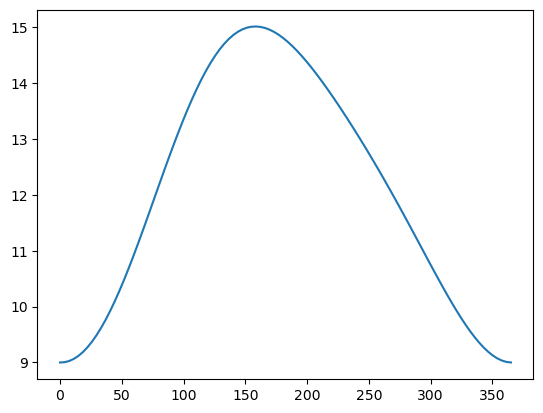

In [4]:

nodes = np.array([0,61,152,243,334])
values = np.array([9,11,15,13,9.5])
def basisPol(x):
    return np.array([1, np.cos(x), np.sin(x), np.cos(2*x), np.sin(2*x)])
A = np.zeros([5, 5])
for i in range(5):
    A[i] = basisPol(nodes[i] * 2*np.pi / 365)
sol = np.linalg.solve(A, values)
def pol(x):
    return sol[0] + np.cos(x) * sol[1] + sol[2] * np.sin(x) + sol[3] * np.cos(2*x) + sol[4] * np.sin(2*x)
x = np.linspace(0, 365, 100)
plt.plot(x, pol(x*2*np.pi/365))

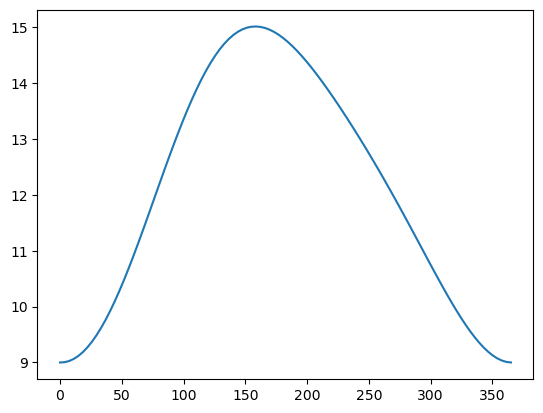

In [5]:

nodes = np.array([0,61,152,243,334])
values = np.array([9,11,15,13,9.5])
def basisPol(x):
    return np.array([1, np.cos(x), np.sin(x), np.cos(2*x), np.sin(2*x)])
A = np.zeros([5, 5])
for i in range(5):
    A[i] = basisPol(nodes[i] * 2*np.pi / 365)
sol = np.linalg.solve(A, values)
def pol(x):
    return sol[0] + np.cos(x) * sol[1] + sol[2] * np.sin(x) + sol[3] * np.cos(2*x) + sol[4] * np.sin(2*x)
x = np.linspace(0, 365, 100)
plt.plot(x, pol(x*2*np.pi/365))

{a: 93/56, b: -33/280, c: -1/5}


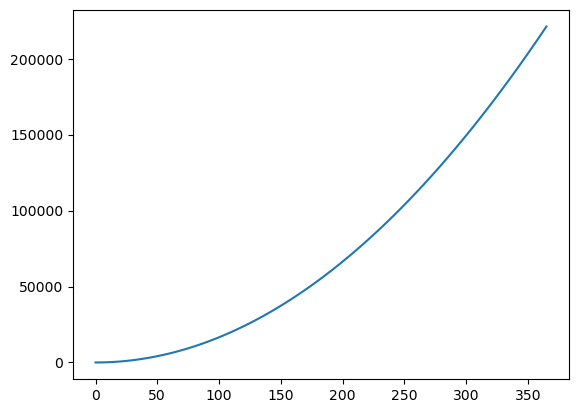

In [13]:

#zadachi - least squares
import sympy as sp
nodes = np.array([-2,-1,0,1,2,3])
values = np.array([7,1,0,1,7,14])
a,b,c = sp.symbols('a,b,c')
def f(x,a,b,c):
    return a*x**2 + b*x + c

def sumSquares(nodes, values,a,b,c):
    sum = 0
    for i in range(6):
        sum += (f(nodes[i], a,b,c) - values[i])**2
    return sum
    
a1 = sp.diff(sumSquares(nodes, values, a,b,c), a)
a2 = sp.diff(sumSquares(nodes, values, a,b,c), b)
a3 = sp.diff(sumSquares(nodes, values, a,b,c), c)

solution = sp.solve([sp.Eq(a1, 0), sp.Eq(a2, 0), sp.Eq(a3, 0)])
print(solution)
def g(x, solution):
    return solution[a]*x**2 + solution[b] * x + solution[c]
plt.plot(x, g(x, solution))

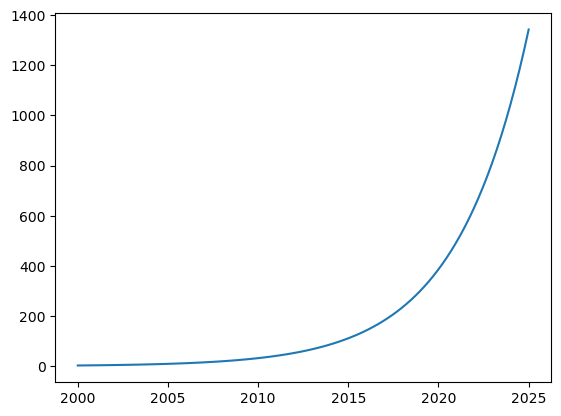

In [25]:
import pandas as pd
df = pd.read_csv('amazon_sales_net_revenue.csv')
years = df.loc[:, "year"]
revenue = df.loc[:, "revenue"]

newvals = np.array([np.log(x) for x in revenue])
a,b = sp.symbols('a,b')
def squares(nodes, vals, a,b):
    sum = 0
    for i in range(len(years)):
        sum += (a + b*nodes[i] - vals[i])**2
    return sum
a1 = sp.diff(squares(years, newvals, a,b), a)
a2 = sp.diff(squares(years, newvals, a,b), b)
sol = sp.solve([sp.Eq(a1, 0), sp.Eq(a2, 0)])

x = np.linspace(2000, 2025, 100)
def f(x):
    return np.exp(float(sol[a]) + float(sol[b])*x)
plt.plot(x, f(x))

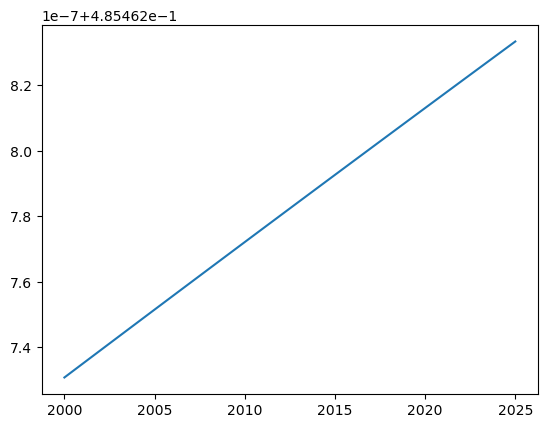

In [27]:
nodes = np.array([1,2,3,4,5])
values = np.array([0.5, 0.7, 1.2, 2, 3.4])
newnodes = np.array([1/y for y in nodes])
newvals = np.array([1/y for y in values])
a,b = sp.symbols('a,b')
def squares(newnodes,newvals,a,b):
    sum = 0
    for i in range(5):
        sum += (a*newnodes[i] + b - newvals[i])**2
    return sum

a1 = sp.diff(squares(newnodes,newvals,a,b), a) 
a2 = sp.diff(squares(newnodes,newvals,a,b), b)

sol = sp.solve([sp.Eq(a1,0), sp.Eq(a2, 0)])
def f(x):
   return 1/sol[a] * x/(sol[b] / sol[a] + x)

plt.plot(x, f(x))

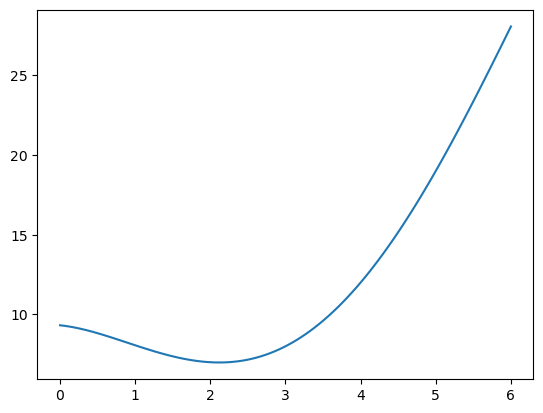

In [31]:
def sumX(nodes, s, power):
    return sum([nodes[i]**power for i in range(s)])
def sumY(nodes, s, power, values):
    return sum([values[i] * nodes[i]**power for i in range(s)])
    
def least_squares(x_values, y_values, n,x):
    s = len(x_values)
    A = np.zeros([n+1,n+1])
    for i in range(n+1):
        for j in range(n+1):
            A[i][j] = sumX(x_values, s, i+j)
            
    a = np.zeros([n+1])
    for i in range(n + 1):
        a[i] = sumY(x_values,s, i,y_values)
    sol = np.linalg.solve(A, a)
    pol = 0
    for i in range(n+1):
        pol += sol[i] * x**i
    return pol
nodes = np.array([11,2,3,4,5])
values = np.array([6,7,8,12,19])
n = 4
x = np.linspace(0,6,100)
plt.plot(x,least_squares(nodes, values,n,x))

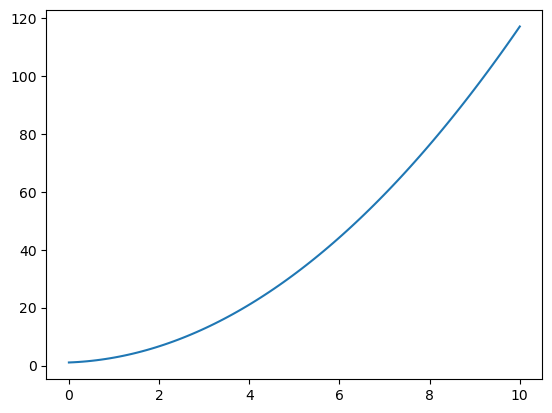

In [36]:
x = sp.symbols('x')
def f(x):
    return sp.exp(x)

def g(x,a,b,c):
    return sp.integrate((f(x) - a*x**2 - b*x - c)**2, (pox,0,1.5))

a1 = sp.diff(g(x,a,b,c), a)
a2 = sp.diff(g(x,a,b,c), b)
a3 = sp.diff(g(x,a,b,c), c)

sol = sp.solve([sp.Eq(a1,0), sp.Eq(a2,0), sp.Eq(a3,0)])
x = np.linspace(0,10,100)
def final(x):
    return sol[a]*x**2 + sol[b]*x+sol[c]
plt.plot(x,final(x))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
radiation = np.array([45.9, 78.2, 123.5, 172.6, 223.5, 255.3, 286.0, 183.9, 116.2, 57.8, 37.7])
dayswithaug = np.arange(0,12*30,30)
days = np.delete(dayswithaug,7)
def basisPol(x):
    
    A = np.ones(11)

    for i in range(1,11):
        if i % 2 == 0:
            A[i] = np.sin(x*(i/2))
        else:
            A[i] = np.cos(x*math.ceil(i/2))
   
    return A
B = np.zeros([11,11])
for i in range(11):
    B[i] = basisPol(days[i]*2*np.pi/365)
sol = np.linalg.solve(B, radiation)
def func(sol,x):
    pol = sol[0]
    for i in range(1,11):
        if i % 2 == 0:
            pol += sol[i]*np.sin(x*(i/2))
        else:
            pol += sol[i]* np.cos(x*math.ceil(i/2))
    return pol
        

print(func(sol, 210*2*np.pi/365))
x = np.linspace(0,365,111)
plt.plot(x, func(sol,x*2*np.pi/365))

In [ ]:
n = 11
A = np.ones(n)
B = np.zeros([n,n])
def basisPol(x):
for i in range(1,n):
    if i% 2 == 0:
        A[i] = np.sin(i/2* x)
    else:
        A[i] = np.cos(math.ceil(i/2)*x)
    return A

for i in range(1,11):
    B[i] = basisPol(nodes[i])
sol = np.linalg.solve(B, values)
sum=
for i in range(1,n):
    if i% 2 == 0:
         sum+= np.sin(i/2* x)
    else:
        sum+= np.cos(math.ceil(i/2)*x)
    return sum

In [ ]:
nodes = [1,2,3,4]
A = np.zeros([n,n])
for i in range():
    for k in range(s):
            b[i] += values[k]*nodes[k]**i
    for j in range():
        sum = 0
        for k in range(s):
            sum += nodes[k]**(i+j)
        A[i][j] = sum
        
np.linalg.solve(A,b)